<a href="https://colab.research.google.com/github/sauloemp/Data-Analyzes-from-Airbnb---Veneza/blob/main/Data_Analyzes_from_Airbnb_Veneza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Data Analyzes from Airbnb - Veneza</h1>
<p align="center">
  <img src="https://g4educacao.com/portal/wp-content/uploads/2022/06/airbnb-capa-1-1000x600.png">
</p>

# Introduction
This work is based in [raffaelhfarias](https://github.com/raffaelhfarias/Dados_Airbnb) work, I saw his analyes and I would like to contribuilt with some analyzes. In view of this, I strong advice everyone to see his work before and come back here later.

In this notebook, I'll consider the aspects from this dataset: [Veneza Airbnb Data](http://data.insideairbnb.com/italy/veneto/venice/2022-09-07/visualisations/listings.csv)

[raffaelhfarias](https://github.com/raffaelhfarias/Dados_Airbnb) already developed a data dictionary.


## Who am I...
I'm Saulo. I studied with Rafael and his project call my attention. Because when I was started in data science area I didn't had anyone could give me any kind of way, and I decided help him to show my POV about his project. And become his project more powerful. And maybe one day merge both projects in one.

if do you want know more about me, follow my contacts: [LinkeIn](https://www.linkedin.com/in/saulo-pereira/) and [Github](https://github.com/sauloemp)

#Project Summary
1. Initial Settings
    *   Libraries
    *   Data Reading
    *   Data Dictionarie
    *   Features selection
2. Issues
    *   I would like to identify using a map the most expensive areas in Veneza
    *   I intend to indetfy the most big correlation that price feature have each others
    *   I intend to using techniques of AutoML to find the best models and implement the best model.
    *   Building a Calculator to propose price based in the fetures that you selected
    *   Make possible compare prices based in neighbourhood.



# Initial Settings

In [1]:
# Instalations
!pip install pycaret
!pip install numba==0.53

# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import numpy as np
from pycaret.utils import enable_colab
from pycaret.regression import *

#Settings
warnings.filterwarnings('ignore')
enable_colab()
pd.options.display.float_format = '{:.4f}'.format

%matplotlib inline
plt.rc('figure', figsize = (14, 6))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 19.2 MB/s 
     |████████████████████████████████| 5.0 MB 40.7 MB/s 
     |████████████████████████████████| 88 kB 4.1 MB/s 
     |████████████████████████████████| 141 kB 44.3 MB/s 
     |████████████████████████████████| 2.0 MB 54.1 MB/s 
     |████████████████████████████████| 1.3 MB 50.5 MB/s 
     |████████████████████████████████| 662 kB 15.9 MB/s 
     |████████████████████████████████| 56 kB 1.1 MB/s 
     |████████████████████████████████| 167 kB 45.5 MB/s 
     |████████████████████████████████| 1.7 MB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.8 MB 1.5 MB/s 
     |████████████████████████████████| 16.5 MB 68.2 MB/s 
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 17.2 MB/s 
     |████████████████████████████████| 25.3 MB 81.7 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
Colab mode enabled.


In [2]:
# Data Reading
df = pd.read_csv('http://data.insideairbnb.com/italy/veneto/venice/2022-09-07/visualisations/listings.csv', encoding = 'utf8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.4382,12.3274,Entire home/apt,250,5,175,2022-08-16,1.1200,3,266,12,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.4398,12.3274,Entire home/apt,290,4,75,2022-08-06,0.5600,3,316,11,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.4390,12.3297,Entire home/apt,180,4,195,2022-07-11,1.2900,3,240,11,NaN
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.4328,12.3346,Private room,250,1,416,2022-06-09,2.8300,2,70,5,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.4457,12.3290,Entire home/apt,320,3,96,2022-09-03,0.6900,1,223,18,M0270422294


---
**Data Dictionary**

* `id`: Number of id to identify some properties
* `name`:	name of properties announced
* `host_id`: Number of id that identify some owners from properties
* `host_name`: owners name
* `neighbourhood_group`: Non-valid values in this field
* `neighbourhood`: neigthbohood name
* `latitude`: property latitude coordinate
* `longitude`: property longitude coordinate
* `room_type`: the kind of room offer
* `price`: rental price
* `minimum_nights`:	minimum nigths to be in the propertie
* `number_of_reviews`: number of reviews the property has
* `last_review`: last review
* `reviews_per_month`:	review in one month
* `calculated_host_listings_count`:	quantitie of property the owner have been
* `availability_365`: number of days of availability within 365 days
* `number_of_reviews_ltm`:	number of evaluations in the last 12 months
* `license`: the licence of property

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7988 non-null   int64  
 1   name                            7988 non-null   object 
 2   host_id                         7988 non-null   int64  
 3   host_name                       7988 non-null   object 
 4   neighbourhood_group             7988 non-null   object 
 5   neighbourhood                   7988 non-null   object 
 6   latitude                        7988 non-null   float64
 7   longitude                       7988 non-null   float64
 8   room_type                       7988 non-null   object 
 9   price                           7988 non-null   int64  
 10  minimum_nights                  7988 non-null   int64  
 11  number_of_reviews               7988 non-null   int64  
 12  last_review                     71

In [4]:
# Feature Selection and ETL part
# In this step and to create a model, I'll conside Just Numeric fields, that I belive impact in price.

#Data Transformation
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

#Put a feature to identify if there is or there isn't a contract
df['there_is_licence'] = df['license'].apply(lambda x: 1 if type(x) == str else 0)
df['diff_days'] = round((pd.to_datetime("now") - df['last_review'])/ np.timedelta64(1, 'D'),0)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,there_is_licence,diff_days
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.4382,12.3274,Entire home/apt,250,5,175,2022-08-16,1.1200,3,266,12,NaN,0,120.0000
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.4398,12.3274,Entire home/apt,290,4,75,2022-08-06,0.5600,3,316,11,NaN,0,130.0000
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.4390,12.3297,Entire home/apt,180,4,195,2022-07-11,1.2900,3,240,11,NaN,0,156.0000
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.4328,12.3346,Private room,250,1,416,2022-06-09,2.8300,2,70,5,NaN,0,188.0000
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.4457,12.3290,Entire home/apt,320,3,96,2022-09-03,0.6900,1,223,18,M0270422294,1,102.0000


In [5]:
#Features Selection 
df_model_base = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'there_is_licence', 'diff_days']]

# Issues

## Mapping that show The most expensive areas

In [6]:
#Variable to map
df_map = df
#Color Scale to help to identify some important variables
color_scale = [(0, 'green'), (1,'red')]

#Figure
fig = px.scatter_mapbox(df_map, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="neighbourhood", 
                        hover_data=["neighbourhood", "price"],
                        color="price",
                        color_continuous_scale=color_scale,
                        zoom = 10,
                        height=700,
                        width=1600)
#Map Style
fig.update_layout(mapbox_style="open-street-map")
#Margins settings
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#Figure show
fig.show()

In this case It's possible understand the efect of outliears. In this case I'll remove the toppest 5% to see again this same visualization and understand thouse changes.

In [7]:
#Outliers Treatment
q_low = df["price"].quantile(0.00)
q_hi  = df["price"].quantile(0.95)

#New Dataframe Considering Outliers Treatment
df_outliers_removed = df_map[(df_map["price"] < q_hi) & (df_map["price"] > q_low)]

#Figure
fig = px.scatter_mapbox(df_outliers_removed, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="neighbourhood", 
                        hover_data=["neighbourhood", "price"],
                        color="price",
                        color_continuous_scale=color_scale,
                        zoom = 10,
                        height=700,
                        width=1600)

#Map Style
fig.update_layout(mapbox_style="open-street-map")
#Margins settings
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#Figure show
fig.show()

Now it's more possible compare prices and see the most expensive places.

## Correlation that price feature have each others

In [8]:
#Correlation tratement into data
df_corr_figure = df_model_base.corr()['price'][1:].reset_index()
df_corr_figure = df_corr_figure.rename(columns={"index": "Features", "price": "Correlation"})
df_corr_figure['kind'] = df_corr_figure['Correlation'].apply(lambda x: 'negative' if x <0 else 'positive')
df_corr_figure['Correlation'] = df_corr_figure['Correlation'].round(4)

#Colors to chart
colors = {'negative': 'red',
          'positive': 'darkgreen'}

#Bar plot
fig =  px.bar(df_corr_figure, 
              x='Features', 
              y='Correlation', 
              color = 'kind', 
              color_discrete_map=colors, 
              text_auto='.2',
              title = 'Price Correlation with other Features'
              )
#Correlation is bettween -1 to 1
fig.update(layout_yaxis_range = [-1,1])
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
#Show figure
fig.show()

There is not an strong correlation amoung the variables Analyzed. It means It'll be hard to building a representative model and able to generalize the results. Maybe the AutoML help me to find an alternative model and select the ideal features to price feature.

## AutoML to select models

In [21]:
#Analyzes from Null Values
print('The raw data have this quantites of Null Values')
print(pd.isnull(df).sum())
print('\n\nThe raw data have: \nRows: {} \nColumns: {}'.format(df.shape[0],df.shape[1]))

The raw data have this quantites of Null Values
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        798
reviews_per_month                  798
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6311
there_is_licence                     0
diff_days                          798
dtype: int64


The raw data have: 
Rows: 7988 
Columns: 20


**Explanation about Null Values:** \
\
It'means we have almost 10% of null data. The main reason is the field last review. Places without no ``last_review`` impects in ``review_per_month`` (Because they didn't have a review before) and ``diff days`` because it's a calculated field based in ``last_review``. About the ``license`` field it's normal a place into Airbnb not have licence to work.\
\
**How to Handle with those fields:** \
\
``last_review``: To our model I intend to Exclude this field;\
``reviews_per_month``: I'll use the average to cover the Null values;\
``licence``: Insted of use this field I intend to see the field ``there_is_licence`` because I'll know if there is or there is not a licence and it'll not necessarie to considere this field into the model;\
``diff_days``: I'll use the average to cover the Null values;\
\
In the end, I'll not need exclude line. Butwe had the work to put some new columns so I intend to enjoy the step of feature selection part of this work.

#Just See Again Wants Happen With Null Values


In [26]:
#ETL
df_model_base= df_model_base.fillna(df_model_base.mean())

#Review of null values
print('The raw data have this quantites of Null Values')
print(pd.isnull(df_model_base).sum())
print('\n\nThe raw data have: \nRows: {} \nColumns: {}'.format(df_model_base.shape[0],df_model_base.shape[1]))

The raw data have this quantites of Null Values
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
there_is_licence                  0
diff_days                         0
dtype: int64


The raw data have: 
Rows: 7988 
Columns: 9


In [28]:
s = setup(df_model_base, target = 'price')

,Description,Value
0,session_id,3840
1,Target,price
2,Original Data,"(7988, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5591, 8)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [29]:
#Comparation with some models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,125.9684,281481.7070,496.2249,0.6859,0.6647,0.8072,1.0060
lightgbm,Light Gradient Boosting Machine,129.1152,290095.9739,495.5005,0.6832,0.7025,0.8680,0.1680
rf,Random Forest Regressor,125.6995,296910.7062,503.8942,0.6800,0.6718,0.8491,2.3870
gbr,Gradient Boosting Regressor,126.1431,295731.0953,495.1768,0.6798,0.6882,0.8810,0.4530
knn,K Neighbors Regressor,140.0113,346394.8410,531.9436,0.6305,0.7377,0.9078,0.0260
dt,Decision Tree Regressor,159.2666,382235.3593,581.9558,0.6209,0.8332,1.0199,0.0650
ada,AdaBoost Regressor,166.0704,351325.6246,569.1084,0.5915,0.8113,1.2956,0.0430
br,Bayesian Ridge,238.1104,1241512.1669,1066.3639,0.0123,0.9857,1.3097,0.0140
llar,Lasso Least Angle Regression,217.8489,1255508.1592,1070.3287,0.0112,0.8897,1.2487,0.0140
en,Elastic Net,242.0782,1243745.9518,1067.2903,0.0100,0.9931,1.3361,0.0130


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3840, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [30]:
#The best model and features
print(best)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3840, verbose=0, warm_start=False)


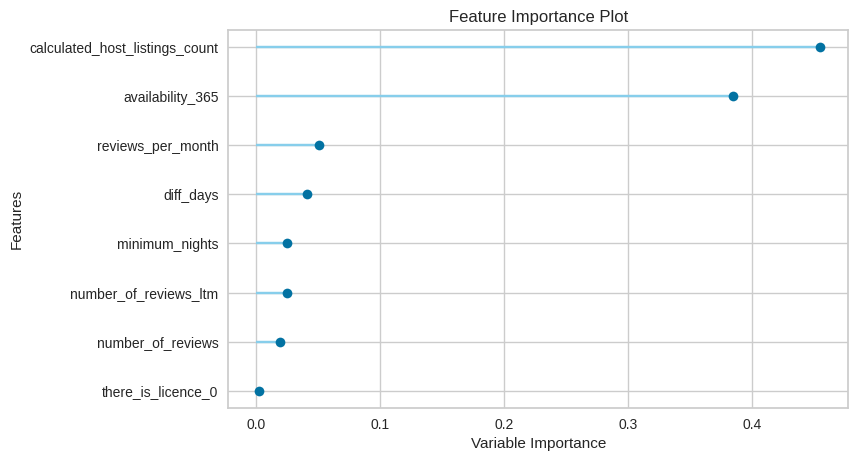

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(best, plot = 'feature')

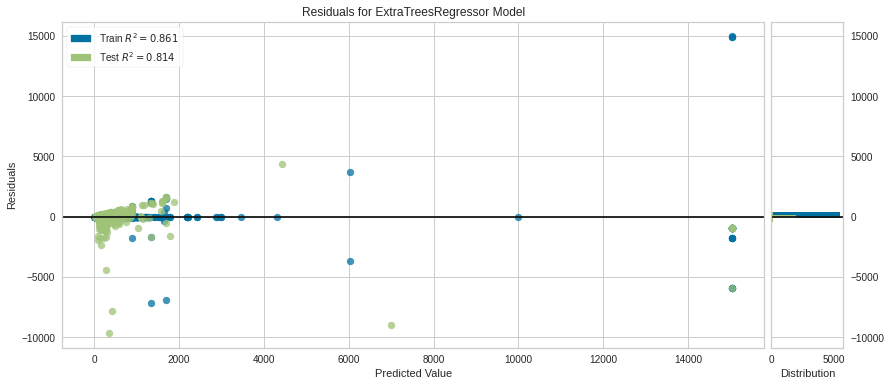

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(best, plot = 'residuals')

In [34]:
predict_model(best)
predictions = predict_model(best, data=df_model_base)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3840, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,118.1705,171956.6172,414.6765,0.8137,0.6705,0.7365


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3840, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,52.9881,175740.5941,419.2143,0.8495,0.4085,0.3129


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,there_is_licence,diff_days,Label
0,250,5,175,1.1200,3,266,12,0,120.0000,135.8700
1,290,4,75,0.5600,3,316,11,0,130.0000,290.0000
2,180,4,195,1.2900,3,240,11,0,156.0000,180.0000
3,250,1,416,2.8300,2,70,5,0,188.0000,250.0000
4,320,3,96,0.6900,1,223,18,1,102.0000,164.5900


# Applaing the model

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

X, y = df_model_base.drop('price', axis= 1), df_model_base['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = ExtraTreesRegressor(
    bootstrap=False,
    ccp_alpha=0.0, 
    criterion='mse',
    max_depth=None, 
    max_features='auto', 
    max_leaf_nodes=None,
    max_samples=None, 
    min_impurity_decrease=0.0,
    min_impurity_split=None, 
    min_samples_leaf=1,
    min_samples_split=2, 
    min_weight_fraction_leaf=0.0, 
    n_jobs=-1, 
    oob_score=False, 
    verbose=0, 
    warm_start=False, 
    n_estimators=100,
    random_state=3840).fit(X_train, y_train)

 

In [39]:
reg.score(X_test, y_test) #Return the coefficient of determination of the prediction.

0.824209173466558

In [40]:
df_model_base.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,there_is_licence,diff_days
0,250,5,175,1.1200,3,266,12,0,120.0000
1,290,4,75,0.5600,3,316,11,0,130.0000
2,180,4,195,1.2900,3,240,11,0,156.0000
3,250,1,416,2.8300,2,70,5,0,188.0000
4,320,3,96,0.6900,1,223,18,1,102.0000


## Calculator Price simulation 

In [81]:
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

minimum_nights = widgets.Text(description="Minimun Nights")
number_of_reviews = widgets.Text(description="Number Review")
reviews_per_month = widgets.Text(description="Review in a Month")
calculated_host_listings_count = widgets.Text(description="Host in list")
availability_365 = widgets.Text(description="Avaliablity in one year")
number_of_reviews_ltm = widgets.Text(description="review in one year")
there_is_licence = widgets.Checkbox(value=False, description='Licence',disabled=False,indent=False)
diff_days = widgets.Text(description="Days from last review")

button = widgets.Button(description="Simulation")

left = VBox([minimum_nights, number_of_reviews,reviews_per_month ,calculated_host_listings_count, availability_365, number_of_reviews_ltm, there_is_licence, diff_days])
inputs = HBox([left])


def Simulation(sender):
    input=[[
                float(minimum_nights.value if minimum_nights.value else 0),
                float(number_of_reviews.value if number_of_reviews.value else 0),
                float(reviews_per_month.value if reviews_per_month.value else 0),
                float(calculated_host_listings_count.value if calculated_host_listings_count.value else 0),
                float(availability_365.value if availability_365.value else 0),
                float(number_of_reviews_ltm.value if number_of_reviews_ltm.value else 0),
                float(0 if there_is_licence == False else 1),
                float(diff_days.value if diff_days.value else 0)
             ]]
    print('$ {0:.2f}'.format(reg.predict(input)[0]))


button.on_click(Simulation)

In [82]:
display(inputs, button)

Button(description='Simulation', style=ButtonStyle())

$ 171.72


##Price Comparation

In [119]:
Neigbourhood1 = widgets.Combobox(
    # value='San Polo',
    placeholder='Choose Neigbourhood',
    options=list(df['neighbourhood'].unique()),
    description='District1',
    ensure_option=True,
    disabled=False
)

Neigbourhood2 = widgets.Combobox(
    # value='San Polo',
    placeholder='Choose Neigbourhood',
    options=list(df['neighbourhood'].unique()),
    description='District2',
    ensure_option=True,
    disabled=False
)

inputs = widgets.VBox([Neigbourhood1, Neigbourhood2])
button = widgets.Button(description="Compare", tooltip='Compare how much one neighborhood costs compared to another')

def Compare(sender):
  if Neigbourhood1 != Neigbourhood2:
    Main_n1_price = round(df[df['neighbourhood']== Neigbourhood1.value]['price'].mean(),2)
    Main_n2_price = round(df[df['neighbourhood']== Neigbourhood2.value]['price'].mean(),2)
    cheap_Or_Expensive = 'Cheap' if Main_n1_price < Main_n2_price else 'Expensive'
    percent = round(abs(((Main_n2_price*100)/Main_n1_price)-100),2)

    if Main_n1_price == Main_n2_price:
      print('Both neigbourhood have he same average price')
    else:
      print('The {} district has on avarage {}, and the district of {} has on avarage {} \nIt means the neigborhood {} is {} more in {}% in relation of {}'.format(
          Neigbourhood1.value, 
          Main_n1_price, 
          Neigbourhood2.value, 
          Main_n2_price, 
          Neigbourhood1.value,
          cheap_Or_Expensive,
          percent,
          Neigbourhood2.value
          ))


button.on_click(Compare)
display(inputs, button)

Button(description='Compare', style=ButtonStyle(), tooltip='Compare how much one neighborhood costs compared t…

The San Polo district has on avarage 236.3, and the district of Castello has on avarage 218.17 
It means the neigborhood San Polo is Expensive more in 7.67% in relation of Castello
